In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [2]:
x_train=train_datagen.flow_from_directory(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\fruit-dataset\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [4]:
x_test=test_datagen.flow_from_directory(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\fruit-dataset\fruit-dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [6]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [7]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [9]:

model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [11]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=2)

Epoch 1/2
225/225 [==============================] - 237s 1s/step - loss: 1.6474 - accuracy: 0.3351 - val_loss: 1.6580 - val_accuracy: 0.2924
Epoch 2/2
225/225 [==============================] - 121s 537ms/step - loss: 1.6461 - accuracy: 0.3351 - val_loss: 1.6608 - val_accuracy: 0.2924


In [12]:
model.save('fruitdata.h5')

In [13]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [14]:
model=load_model('fruitdata.h5')

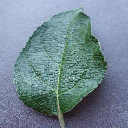

In [17]:
img=image.load_img(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\fruit-dataset\fruit-dataset\train\Apple___healthy\26e85922-aaf1-4cc6-8bdb-2fb0222a4b8c___RS_HL 7624.jpg",target_size=(128,128))
img

In [18]:
x=image.img_to_array(img)
x

array([[[172., 188., 214.],
        [166., 182., 208.],
        [170., 186., 212.],
        ...,
        [161., 176., 205.],
        [160., 175., 204.],
        [165., 180., 209.]],

       [[168., 184., 210.],
        [170., 186., 212.],
        [175., 191., 217.],
        ...,
        [166., 181., 210.],
        [165., 180., 209.],
        [167., 182., 211.]],

       [[169., 185., 211.],
        [170., 186., 212.],
        [174., 190., 216.],
        ...,
        [164., 179., 208.],
        [162., 177., 206.],
        [165., 180., 209.]],

       ...,

       [[ 93.,  92., 124.],
        [127., 126., 158.],
        [100.,  99., 131.],
        ...,
        [110., 117., 146.],
        [108., 115., 144.],
        [111., 118., 147.]],

       [[135., 134., 166.],
        [121., 120., 152.],
        [ 96.,  95., 127.],
        ...,
        [111., 118., 147.],
        [103., 110., 139.],
        [117., 124., 153.]],

       [[ 78.,  77., 109.],
        [110., 109., 141.],
        [114., 1

In [19]:
x=np.expand_dims(x,axis=0)
x

array([[[[172., 188., 214.],
         [166., 182., 208.],
         [170., 186., 212.],
         ...,
         [161., 176., 205.],
         [160., 175., 204.],
         [165., 180., 209.]],

        [[168., 184., 210.],
         [170., 186., 212.],
         [175., 191., 217.],
         ...,
         [166., 181., 210.],
         [165., 180., 209.],
         [167., 182., 211.]],

        [[169., 185., 211.],
         [170., 186., 212.],
         [174., 190., 216.],
         ...,
         [164., 179., 208.],
         [162., 177., 206.],
         [165., 180., 209.]],

        ...,

        [[ 93.,  92., 124.],
         [127., 126., 158.],
         [100.,  99., 131.],
         ...,
         [110., 117., 146.],
         [108., 115., 144.],
         [111., 118., 147.]],

        [[135., 134., 166.],
         [121., 120., 152.],
         [ 96.,  95., 127.],
         ...,
         [111., 118., 147.],
         [103., 110., 139.],
         [117., 124., 153.]],

        [[ 78.,  77., 109.],
       

In [20]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 1s 1s/step


In [21]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [22]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

'Peach___Bacterial_spot'

In [26]:
img=image.load_img(r"C:\Users\Divya Nitheyan\Downloads\Fertilizers_Recommendation\DatasetPlantDisease\fruit-dataset\fruit-dataset\test\Corn_(maize)___healthy\0d27e784-5661-4474-9806-3453c7ef3bf5___R.S_HL 5511 copy.jpg",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']
index[y[0]]

1/1 [==============================] - 0s 96ms/step


'Peach___Bacterial_spot'